In [44]:
#!pip install pydmd

import pydmd

%run DMD_functions.ipynb
%run fDMD_functions.ipynb

In [45]:
def f1(x,t):
    return 1/np.cosh(x+3)*np.exp(t*2.3j)

def f2(x,t):
    return 2/np.cosh(x)*np.tanh(x)*np.exp(t*2.8j)

def f(x,t,mu):
    return mu*f1(x,t)+(1-mu)*f2(x,t)

In [46]:
n_time=129
n_space=5000

x = np.linspace(-10,10, n_space)
t = np.linspace(0,4*np.pi, n_time)

xgrid, tgrid = np.meshgrid(x,t)

known_parameters = np.linspace(0,0.9, 10)
known_parameters


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [47]:
print(xgrid.shape, tgrid.shape)
#prvo xgrid raste, tgrid stoji na 0, pa onda x grid sve ispočetka, tgrid 1,...
#ja hoću manji t za streaming, tako da treba otkačiti zadnji dio x-a i zadnji dio t-a

xsmall = xgrid[:100,:]
tsmall = tgrid[:100,:]

(129, 5000) (129, 5000)


In [48]:
snapshots = np.stack(
    [f(x=xgrid, t=tgrid, mu=p).T for p in known_parameters]
)

print(snapshots.shape)


(10, 5000, 129)


In [49]:
num_beg = 100
x1 = np.hstack([snapshots[:,:,i].T for i in range(num_beg)])

#provjera je li ok formirano
print(x1.shape)
np.allclose(x1[:,13],snapshots[3,:,1])
#izgleda da je.

Z, Lambda, r, Q, R = GEDMDQ(x1, 1e-8)

(5000, 1000)


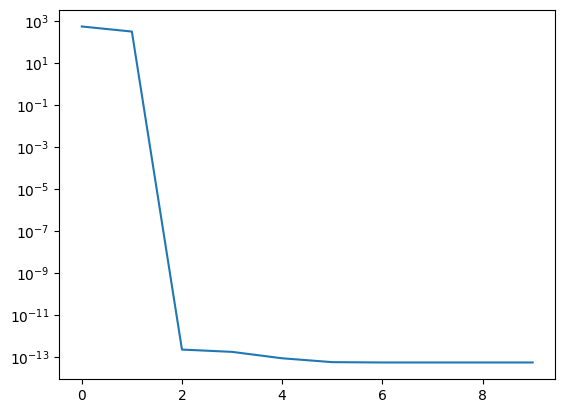

In [50]:
U, Sigma, _ = np.linalg.svd(R)
plt.plot([[i] for i in range(10)], Sigma[:10])
plt.yscale('log')

#kao sto i znamo, samo dvije vrijednosti su nam dosta

U=U[:,:2]
del(Sigma)

In [51]:
num_pars = 10
n_small_time = 100
for i in range(num_pars):
    indices_r = np.arange(i, (n_small_time-1)*num_pars + i+1, num_pars)
    rr = R[:,indices_r]
    if(not i):
        x2 = U.T@rr
    else:
        x2 = np.hstack((x2, U.T@rr))

print(x2.shape)

(2, 1000)


In [52]:
Z, Lambda = DMD(x2[:,:-10], x2[:,10:], tol=1e-8)

#sad tu treba podijeliti z na dijelove,...
#Z_list = np.split(Z, )

In [53]:
for i in range(29):
    print(i)
    Z, Lambda, r, Q, R = DMD_added_snap(snapshots[:,:,num_beg+i].T, Q, R, tol=1e-8)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


(2, 1290)


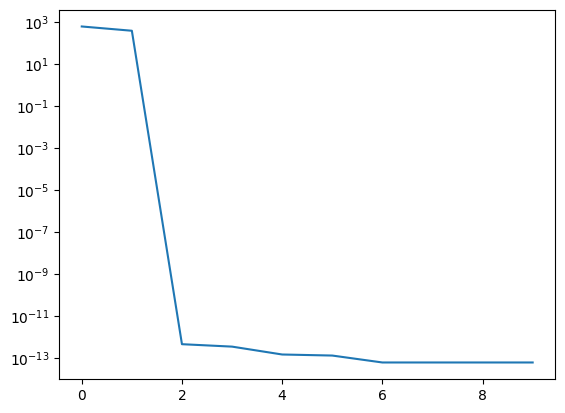

In [54]:
U, Sigma, _ = np.linalg.svd(R)
plt.plot([[i] for i in range(10)], Sigma[:10])
plt.yscale('log')

#kao sto i znamo, samo dvije vrijednosti su nam dosta

U=U[:,:2]
del(Sigma)

num_pars = 10
for i in range(num_pars):
    indices_r = np.arange(i, (n_time-1)*num_pars + i+1, num_pars)
    rr = R[:,indices_r]
    if(not i):
        x2 = U.T@rr
    else:
        x2 = np.hstack((x2, U.T@rr))

print(x2.shape)

(5000, 1290)


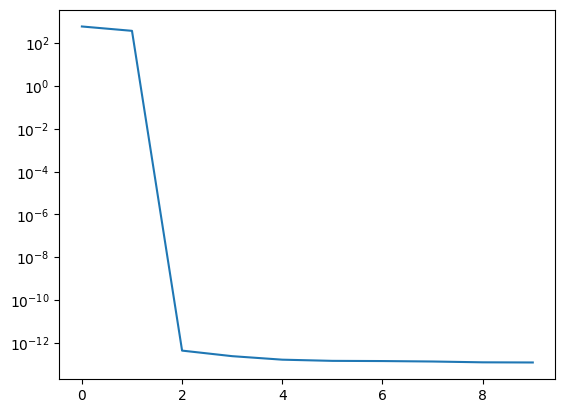

In [55]:
x11 = np.hstack([snapshots[i,:,:] for i in range(num_pars)])
print(x11.shape)

#provjera je li dobro složeno
#print(np.allclose(x11[:,129], snapshots[1,:,0]))

#batch data
U_b, Sigma, _ = np.linalg.svd(x11) ###OVO JE DOSTA SPORIJE NEGO ZA NAS MALI R 
plt.plot([[i] for i in range(10)], Sigma[:10])
plt.yscale('log')

#kao sto i znamo, samo dvije vrijednosti su nam dosta

U_b=U_b[:,:2]
del(Sigma)

In [58]:
for i in range(num_pars):
    if (not i):
        x2_b = U_b.T@x11[:,:n_time]
    else:
        x2_b = np.hstack((x2_b, U_b.T@x11[:,i*n_time:(i+1)*n_time]))

print(x2_b.shape)

(2, 1290)


In [69]:
print(np.allclose(x2[0,:], x2_b[0,:]))
print(np.allclose(x2[1,:], -x2_b[1,:])) #kad se uzme u obzir da je drugi sv vektor - prvi sv. vektor


True
True


In [ ]:
(Q@U).T@U_b #matrica je dijagonalna s elementima 1 i -1, dakle drugi stupac gleda u "drugom" smjeru


array([[ 1.00000000e+00+7.87023775e-17j,  1.13211737e-15+2.75085623e-16j],
       [ 1.25456286e-15-2.73138082e-16j, -1.00000000e+00-9.62285825e-16j]])